In [62]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("/home/cgarcia_2002/nHits_count")

import functions_nHits  # Importa la función que necesitas
import importlib
import functions_spills

importlib.reload(functions_nHits)
importlib.reload(functions_spills)

%matplotlib inline

In [2]:
root_file_path = "/data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P0.root" #bkg
#root_file_path = "/data/cgarcia_2002/WCTE/data/2385_calib_time/WCTE_offline_R2385S0P2.root"  #signal

# Open the ROOT file and get the TTree
file = uproot.open(root_file_path)

tree = file["WCTEReadoutWindows"]  

In [3]:
#DOWNLOAD INFO OF THE TREE

times_branch = tree["hit_pmt_calibrated_times"].array(library="np")
charge_branch = tree["hit_pmt_charges"].array(library="np")
event_number_branch = tree["event_number"].array(library="np")

mpmt_id_branch = tree["hit_mpmt_card_ids"].array(library="np")

times_branch_sorted = []
charge_branch_sorted = []
mpmt_id_branch_sorted = []

for times_evt, charges_evt, mpmt_evt in zip(times_branch, charge_branch, mpmt_id_branch):
    idx_sorted = np.argsort(times_evt)  # índice de orden
    times_branch_sorted.append(times_evt[idx_sorted])
    charge_branch_sorted.append(charges_evt[idx_sorted])
    mpmt_id_branch_sorted.append(mpmt_evt[idx_sorted])

In [4]:
threshold_times = {}
times_branch_modified = []
for event in event_number_branch:

    times_branch_event, threshold_times_event = functions_spills.spill_nHitsTT(times_branch_sorted[event], 5)
    times_branch_modified.append(times_branch_event)
    
    if len(threshold_times_event)!=0:
        threshold_times[event] = threshold_times_event
    

In [19]:
threshold_charges = {}
times_branch_modified_chargesTT = []
charge_branch_modified_chargesTT = []

for event in event_number_branch:
    times_modified, charge_modified, threshold_charge_event = functions_spills.spill_ChargeTT(charge_branch_sorted[event], times_branch_sorted[event], 5000)
    charge_branch_modified_chargesTT.append(charge_modified)
    times_branch_modified_chargesTT.append(times_modified)

    if len(threshold_charge_event)!=0:
        threshold_charges[event] = threshold_charge_event

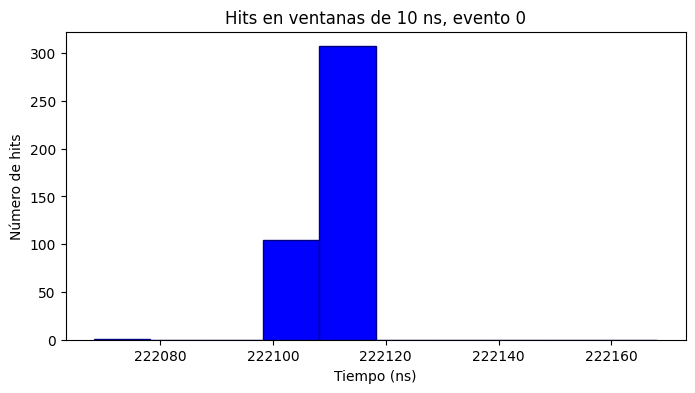

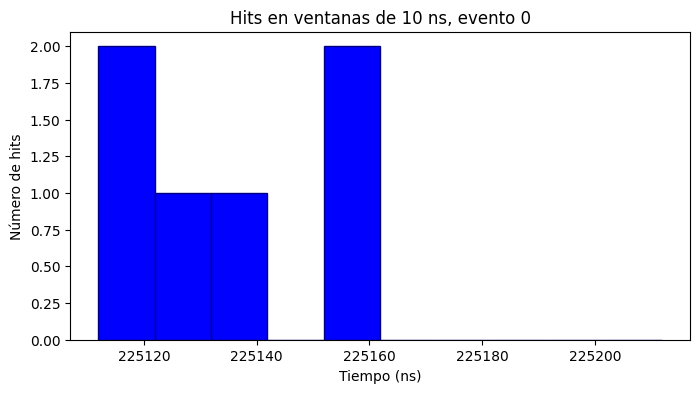

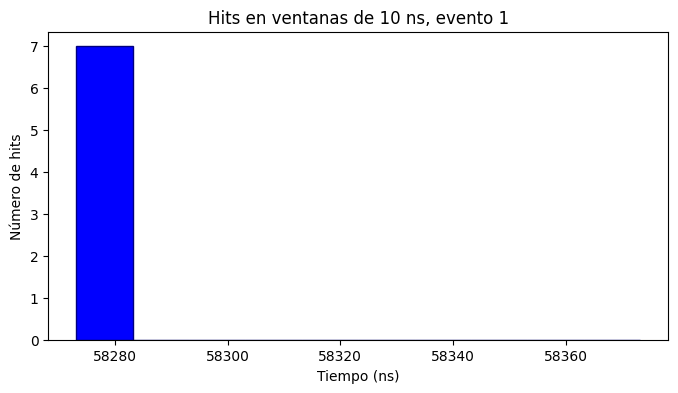

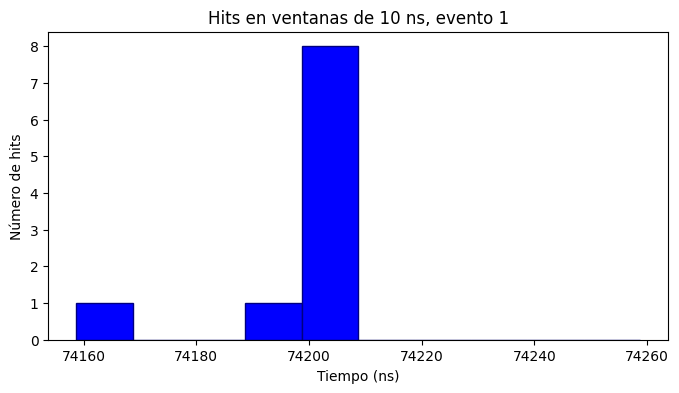

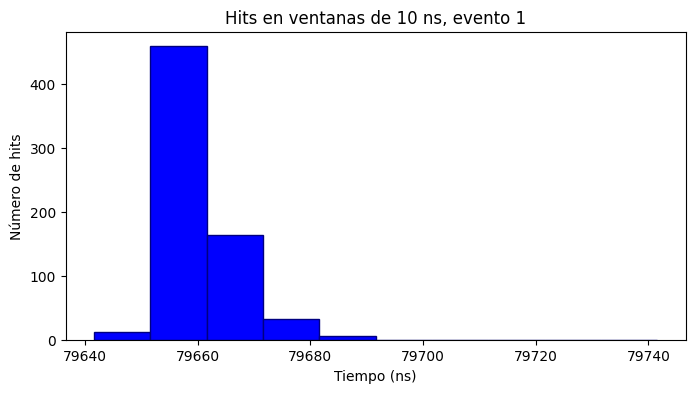

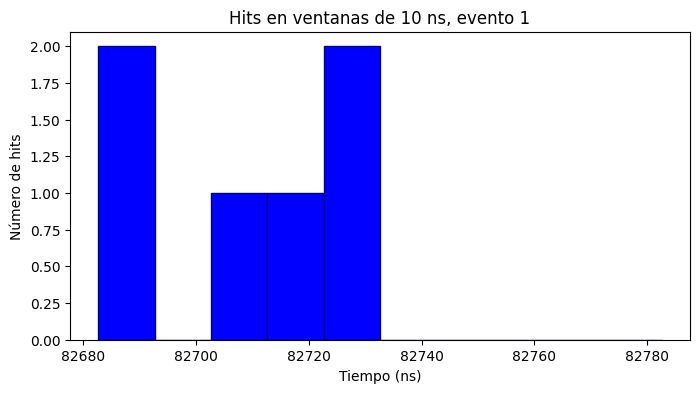

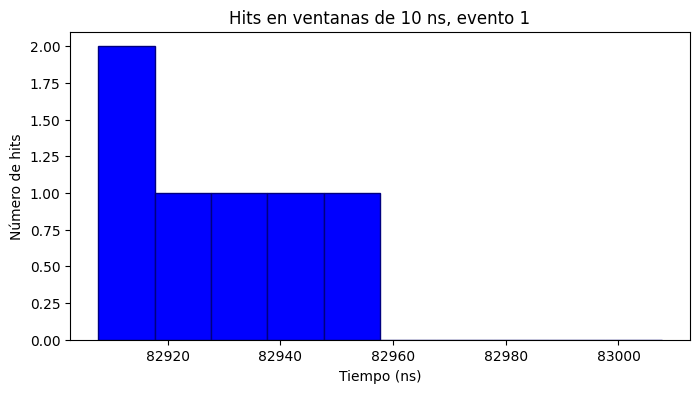

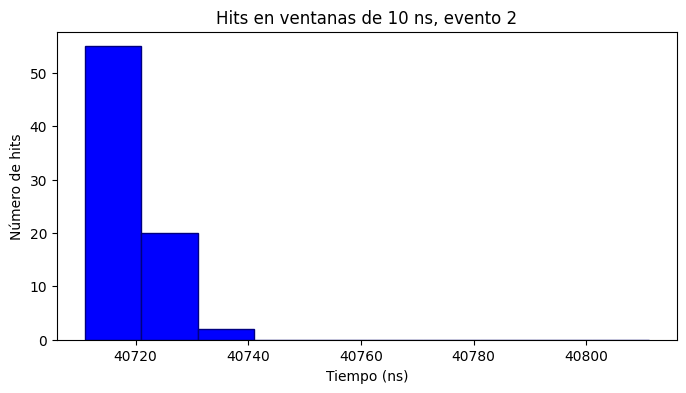

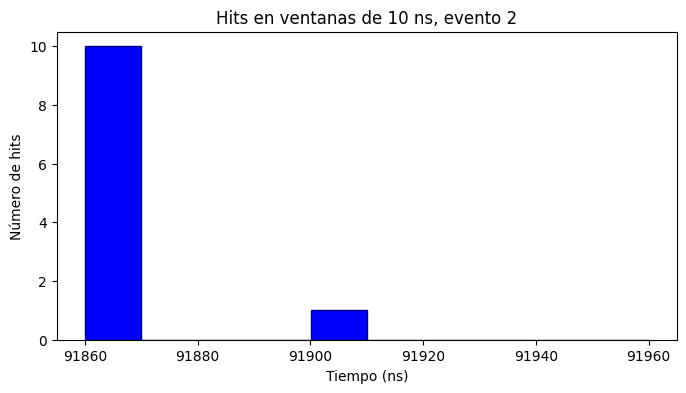

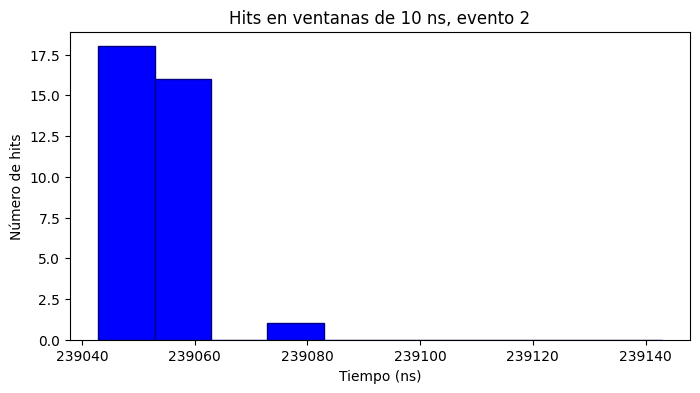

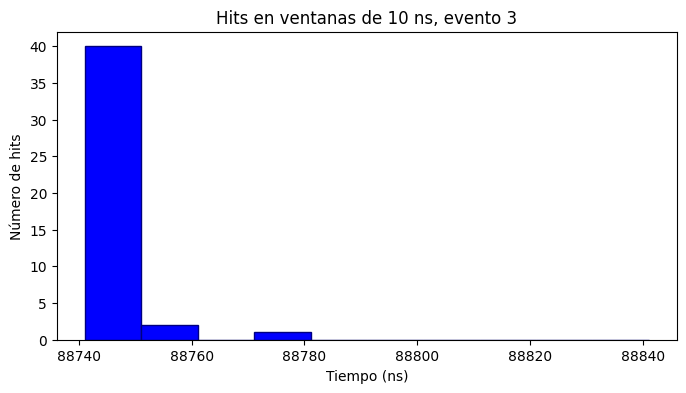

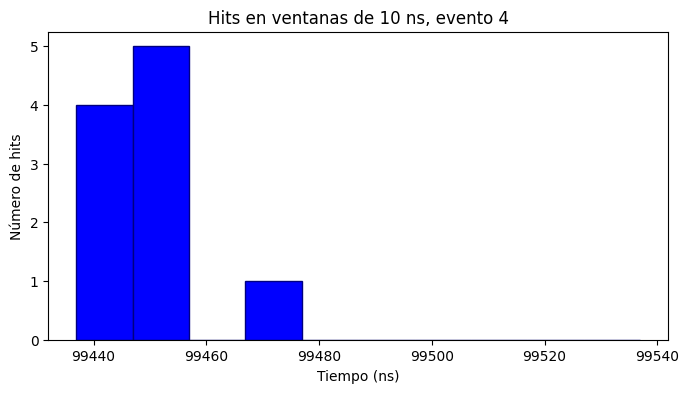

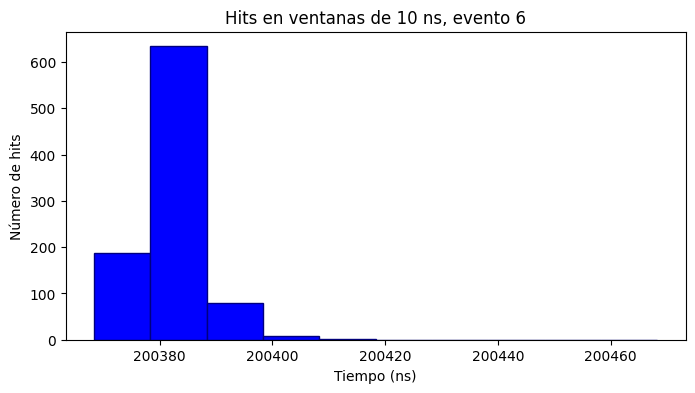

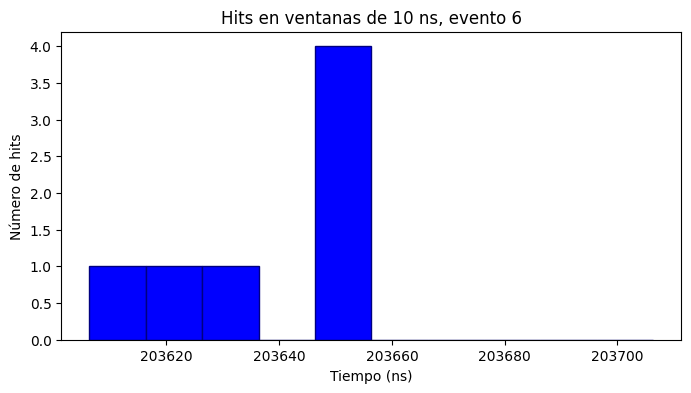

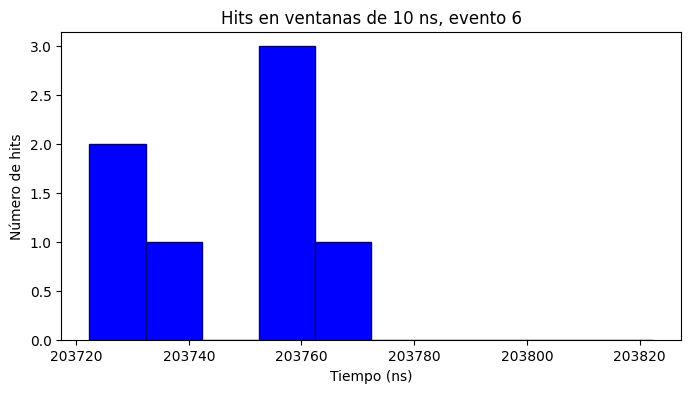

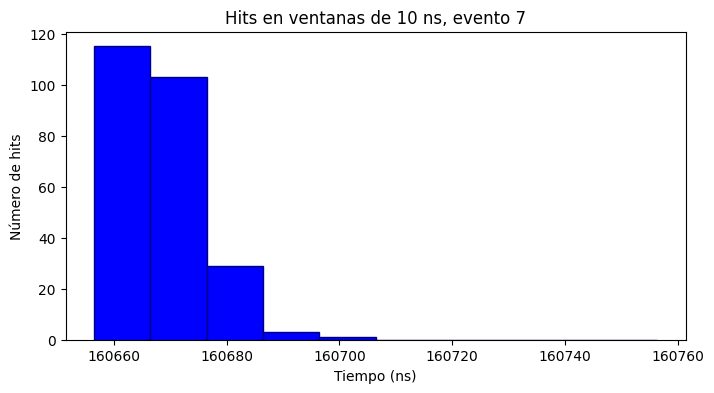

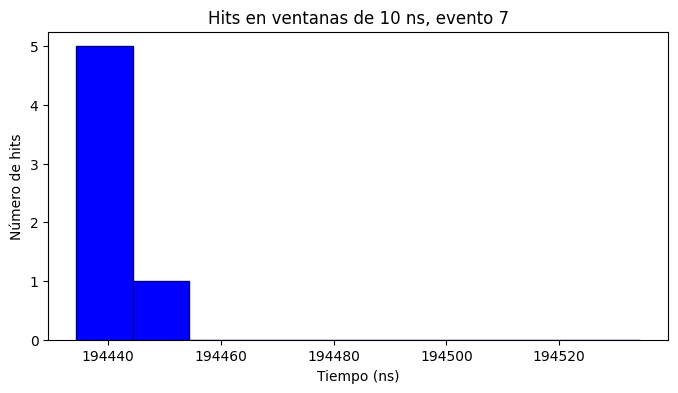

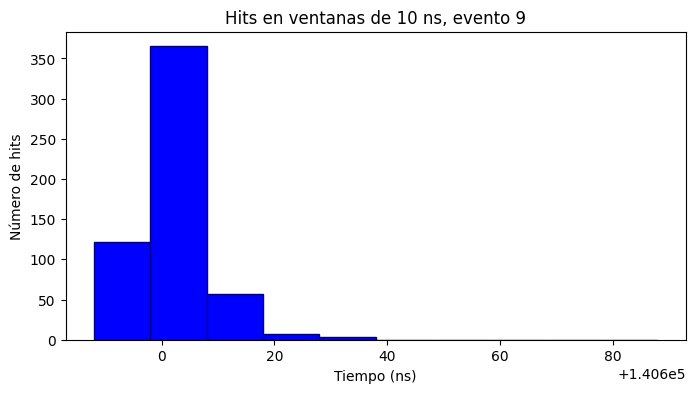

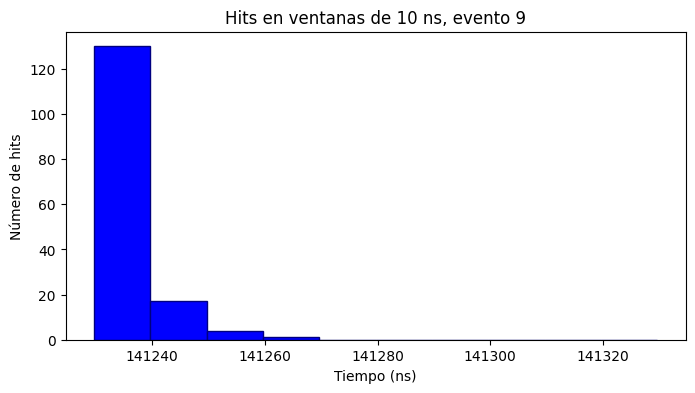

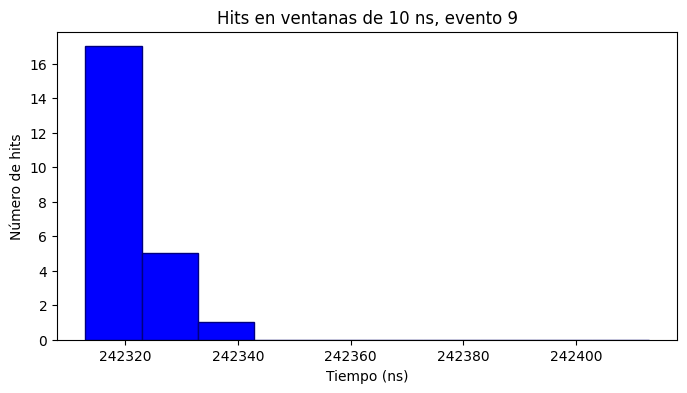

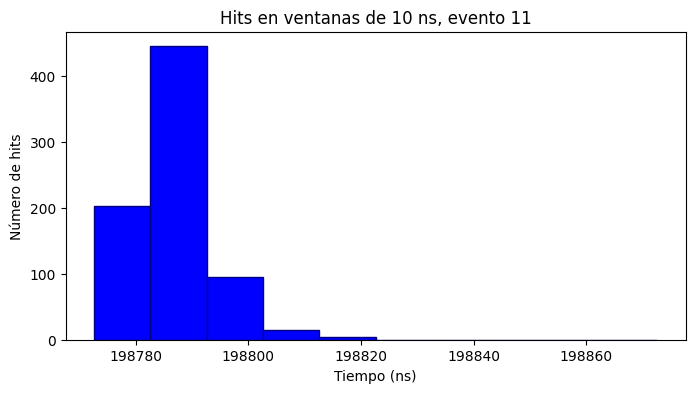

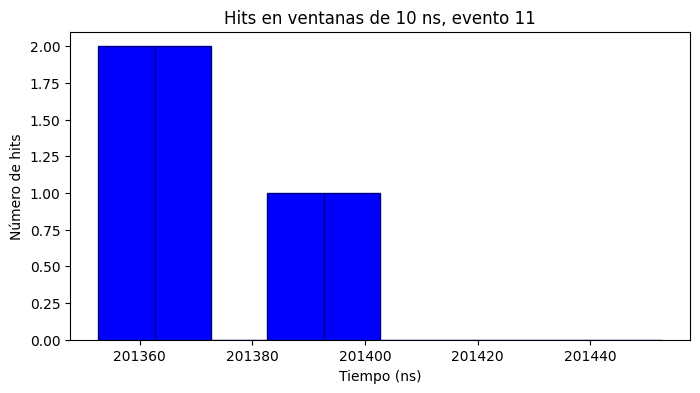

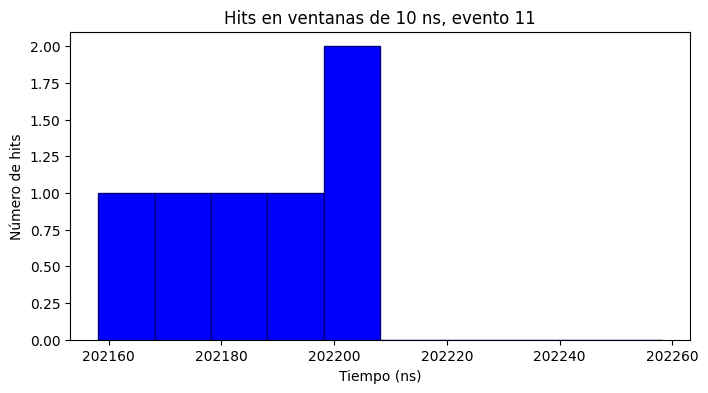

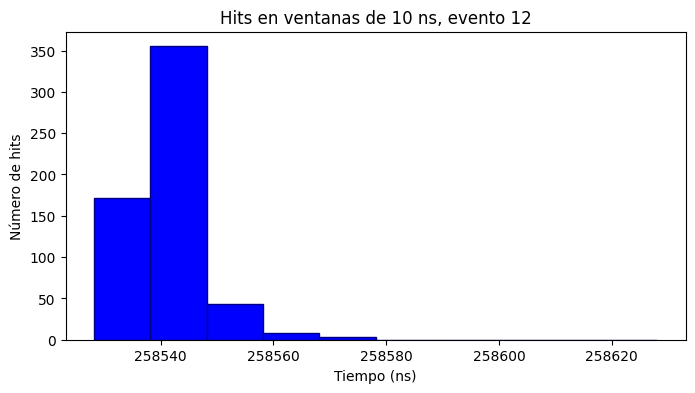

In [6]:
trigger_times_half = dict(list(threshold_times.items())[0:10])

for event_number in trigger_times_half:
    for start_time in trigger_times_half[event_number]:
        times_branch_event = times_branch_modified[event_number] #if changing times_branch for times_branch_modified is the new array with the deleted death windows
        mask = (times_branch_event >= start_time) & (times_branch_event < start_time + 100)

        plt.style.use('default')
        plt.figure(figsize=(8, 4))

        plt.hist(times_branch_event[mask], range = [start_time, start_time+100], bins = 10,color='blue', edgecolor='navy')
        plt.xlabel('Tiempo (ns)')
        plt.ylabel('Número de hits')
        plt.title(f'Hits en ventanas de 10 ns, evento {event_number}')
        plt.show()

In [7]:
import matplotlib
#matplotlib.use('Agg')
import matplotlib.colors as colors
sys.path.append("/home/cgarcia_2002/WCTE_event_display-main/WCTE_event_display-main")

from EventDisplay import EventDisplay

In [20]:
print(threshold_times)
print(threshold_charges)

{0: [222068.19783125, 225111.87715539063], 1: [58273.16474023437, 74158.72694726562, 79641.59936523438, 82682.61042558594, 82907.69821855468], 2: [40711.04923574219, 91860.0288794922, 239042.89394027344], 3: [88741.09262171875], 4: [99436.93738359374], 6: [200368.30894015625, 203606.3454578125, 203722.38274394532], 7: [160656.4315723047, 194434.32850019532], 9: [140587.9583453125, 141229.66341265626, 242312.88437007813], 11: [198772.5917, 201352.66766145313, 202158.13903953126], 12: [258528.1358264297], 13: [9808.704474414062, 46248.54764827344, 126048.36998984375, 147969.03863457032, 209100.7579060547], 14: [26503.421264648438, 66518.64325260156, 72245.37922621093, 154068.64836039062], 15: [25075.472785742186, 52811.41023328125], 16: [131232.6378494922, 131400.91867734375], 17: [54811.028135039065, 101173.44747734375, 104018.93999046875, 104559.0307961328], 19: [188168.15751640624, 253859.43659921875], 20: [203458.29566398438], 21: [19883.734723632813, 70047.86610332031, 123881.922867

(2014,)


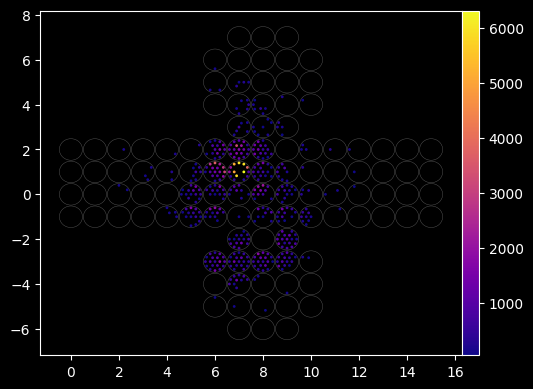

In [39]:
t_evento = 222068.19783125
event_id = 0
delta = 50


# Leer datos
times = tree["hit_pmt_calibrated_times"].array(library="np")
charges = tree["hit_pmt_charges"].array(library="np")
slot_ids = tree["hit_mpmt_slot_ids"].array(library="np")
pmt_positions = tree["hit_pmt_position_ids"].array(library="np")

t = times[event_id]
q = charges[event_id]
slot = slot_ids[event_id]
pos = pmt_positions[event_id]

# Filtrar por tiempo cercano al evento deseado
mask = (t > t_evento - delta) & (t < t_evento + delta)

# Aplicar filtro
t = t[mask]
q = q[mask]
slot = slot[mask]
pos = pos[mask]

# Combinar en canal único para EventDisplay
channel_ids = slot * 19 + pos

# ---------- VISUALIZAR EVENTO ----------

# Crear instancia del EventDisplay
eventDisplay = EventDisplay()
eventDisplay.load_mPMT_positions('mPMT_2D_projection_angles.csv')
eventDisplay.load_wcsim_tubeno_mapping("geofile_WCTE.txt")

# Procesar y graficar
data_to_plot = eventDisplay.process_data(channel_ids, q)
eventDisplay.plotEventDisplay(data_to_plot, color_norm=colors.Normalize(), style="dark_background")
plt.show()
#plt.savefig(f"evento_filtrado_{event_id}_{t_evento}.png")
#plt.close()


412


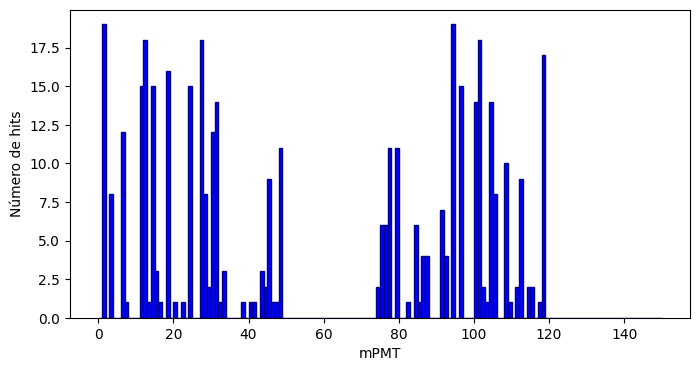

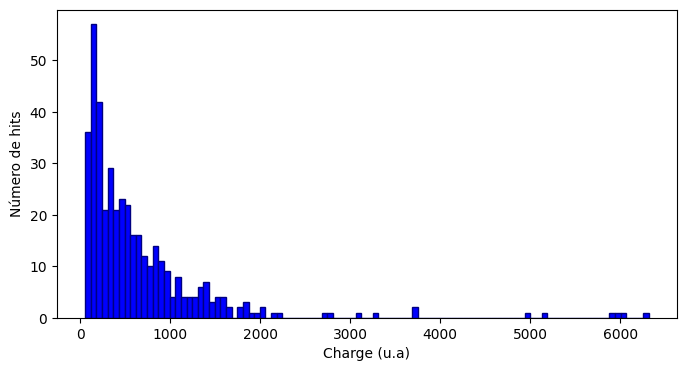

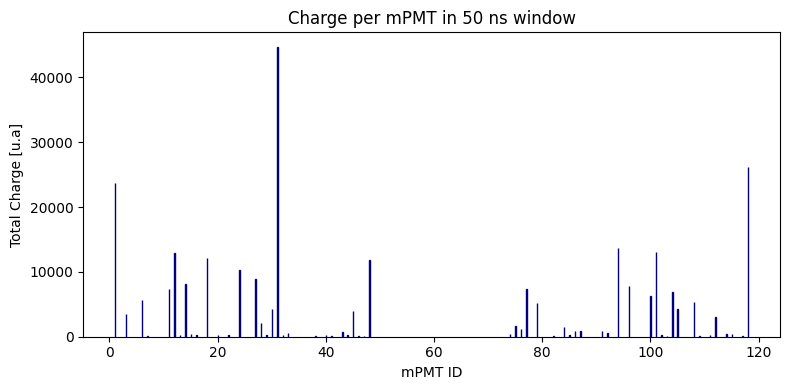

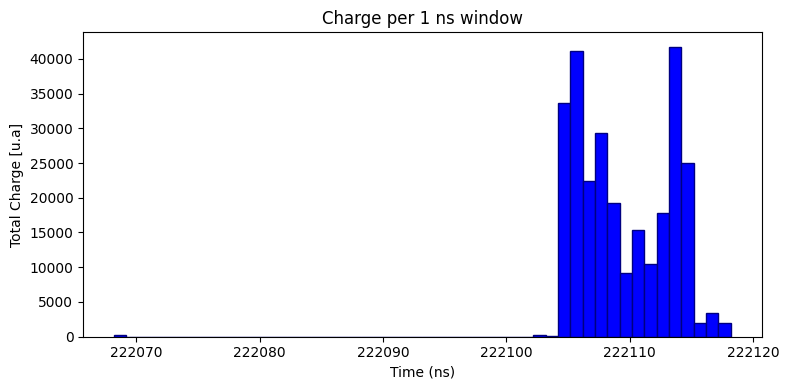

In [64]:
# Definimos el rango de interés
t_min = t_evento
t_max = t_min + 50

mpmt_id_branch_event = mpmt_id_branch[event_id] 
times_branch_event = times_branch[event_id]
charge_branch_event = charge_branch[event_id]


# Seleccionamos los índices de los elementos que cumplen la condición
indices_en_rango = np.where((times_branch_event >= t_min) & (times_branch_event < t_max))[0]
print(len(times_branch_event[indices_en_rango]))
mpmt_id = mpmt_id_branch_event[indices_en_rango]
charge = charge_branch_event[indices_en_rango]
time = times_branch_event[indices_en_rango]

plt.style.use('default')
plt.figure(figsize=(8, 4))
plt.hist(mpmt_id, bins=150, range = [0, 150], color='blue', edgecolor='navy')
plt.xlabel('mPMT')
plt.ylabel('Número de hits')
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(charge, bins=100, color='blue', edgecolor='navy')
plt.xlabel('Charge (u.a)')
plt.ylabel('Número de hits')
plt.show()


functions_spills.plot_TotalCharge_mPMT(mpmt_id, charge)

bin_time = 1
sum_charges = functions_spills.plot_TotalCharge_Time(time, charge, bin_time)

# Step 3: Plot
plt.figure(figsize=(8, 4))
plt.bar(np.arange(min(time), min(time)+50, bin_time), sum_charges, width = bin_time, color='blue',  align='edge', edgecolor='navy')
plt.xlabel("Time (ns)")
plt.ylabel("Total Charge [u.a]")
plt.title(f"Charge per {bin_time} ns window")
plt.tight_layout()
plt.show()

412 412 412


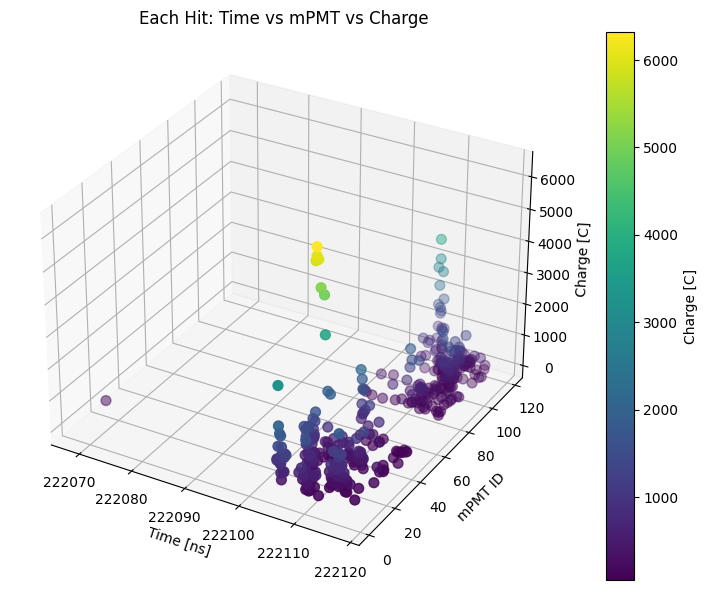

In [58]:
# Convert to arrays (optional but neat)
X = np.array(time)     # time
Y = np.array(mpmt_id)     # mPMT
Z = np.array(charge)   # charge

print(len(X), len(Y), len(Z))
# Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(X, Y, Z, c=Z, cmap='viridis', s=50)
ax.set_xlabel("Time [ns]")
ax.set_ylabel("mPMT ID")
ax.set_zlabel("Charge [C]")
ax.set_title("Each Hit: Time vs mPMT vs Charge")
fig.colorbar(sc, label="Charge [C]")

plt.tight_layout()
plt.show()

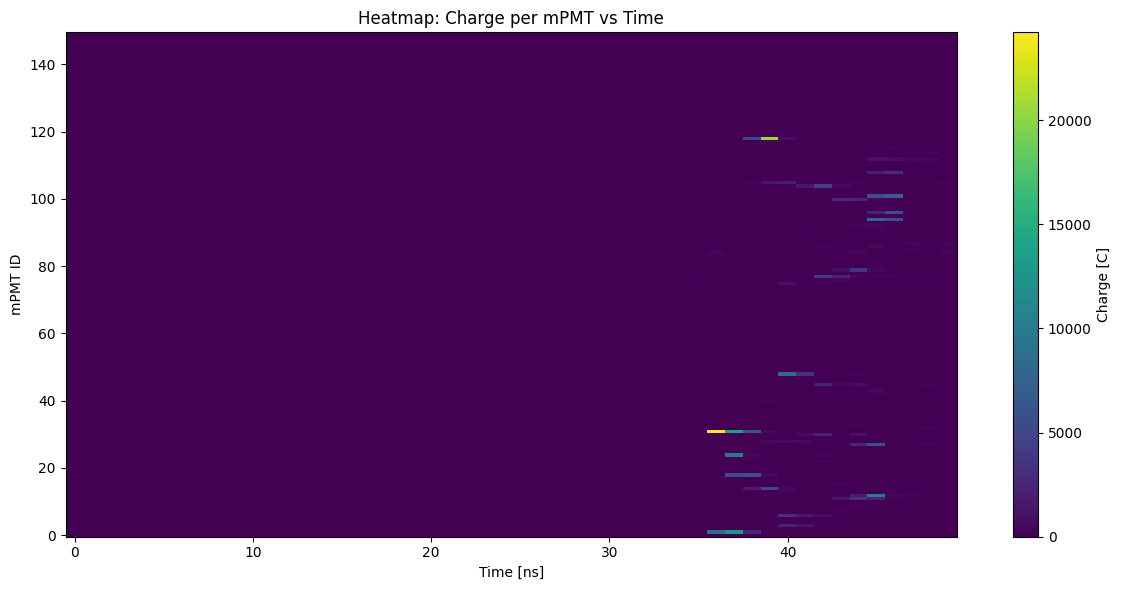

In [59]:
# Define bin edges
x = np.arange(0, 50, 1)    # Time bins (e.g. 50 ns range, 1 ns per bin)
y = np.arange(0, 150, 1)   # mPMT ID bins (0 to 149)

# Create the meshgrid for plotting (dimensions: [mPMT, time])
X, Y = np.meshgrid(x, y)

# Get bin indices using your custom binning function
i = (time - np.min(time))//1
j = mpmt_id // 1       # mPMT bins

# Initialize Z matrix: rows = mPMTs, cols = time bins
z = np.zeros((len(y), len(x)))  # Shape: (150, 50)

# Fill the Z matrix with summed charge
for time_i, mpmt_j, charge_k in zip(i, j, charge):
    z[int(mpmt_j), int(time_i)] += charge_k

# Plot the heatmap
plt.figure(figsize=(12, 6))
pcm = plt.pcolormesh(X, Y, z, shading='auto', cmap='viridis')

# Labels and colorbar
plt.xlabel("Time [ns]")
plt.ylabel("mPMT ID")
plt.title("Heatmap: Charge per mPMT vs Time")
cbar = plt.colorbar(pcm)
cbar.set_label("Charge [C]")

plt.tight_layout()
plt.show()

In [60]:
print(threshold_charges)

{0: [119974.41772460938, 222068.19783125], 1: [79641.59936523438, 119974.40600585938], 2: [40711.04923574219, 119974.40112304688, 239042.89394027344], 3: [88741.09262171875, 119974.39318847656], 4: [119974.39318847656], 5: [119974.435546875], 6: [119974.419921875, 200368.30894015625], 7: [119974.42272949219, 160656.4315723047], 8: [119974.40698242188], 9: [119974.45178222656, 140587.9583453125, 141229.66341265626], 10: [119974.47875976562], 11: [119974.40698242188, 198772.5917], 12: [119974.40698242188, 258528.1358264297], 13: [119966.60229492188, 126048.36998984375, 147969.03863457032, 209100.7579060547], 14: [26503.421264648438, 119966.62194824219, 154068.64836039062], 15: [119966.59655761719], 16: [119966.60229492188], 17: [54811.028135039065, 101173.44747734375, 119966.59020996094], 18: [119966.60888671875], 19: [119966.59020996094, 188168.15751640624, 253859.43659921875], 20: [119966.63623046875], 21: [119966.6240234375, 123881.9228671875, 195205.40990058595], 22: [119966.62194824

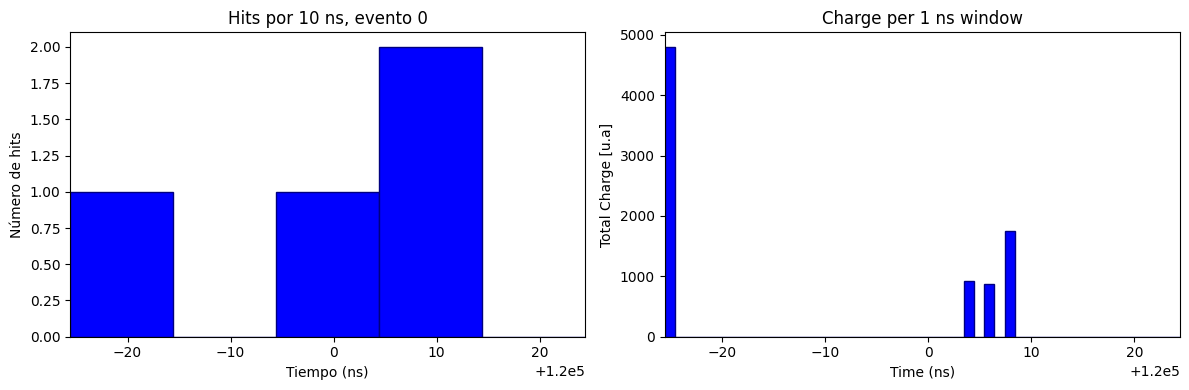

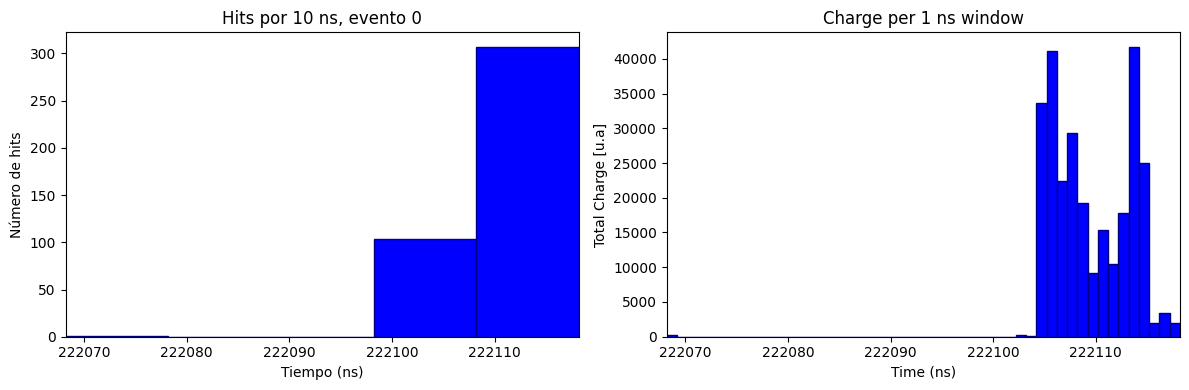

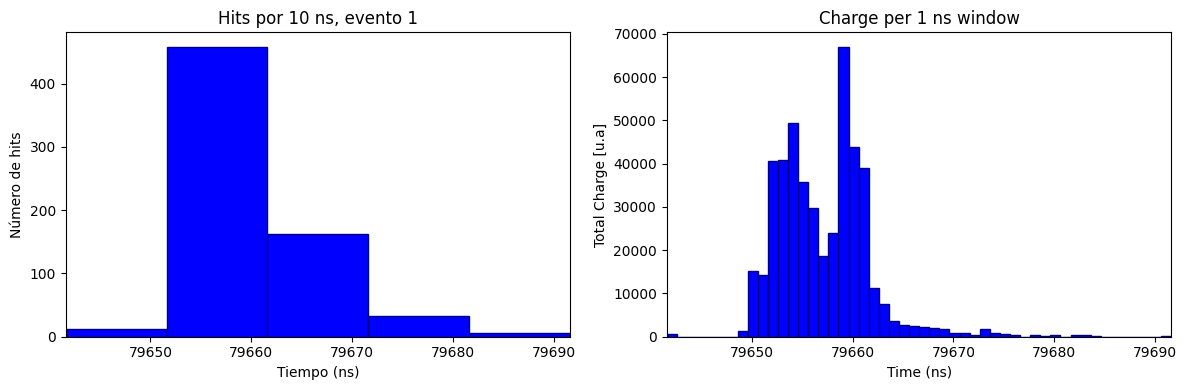

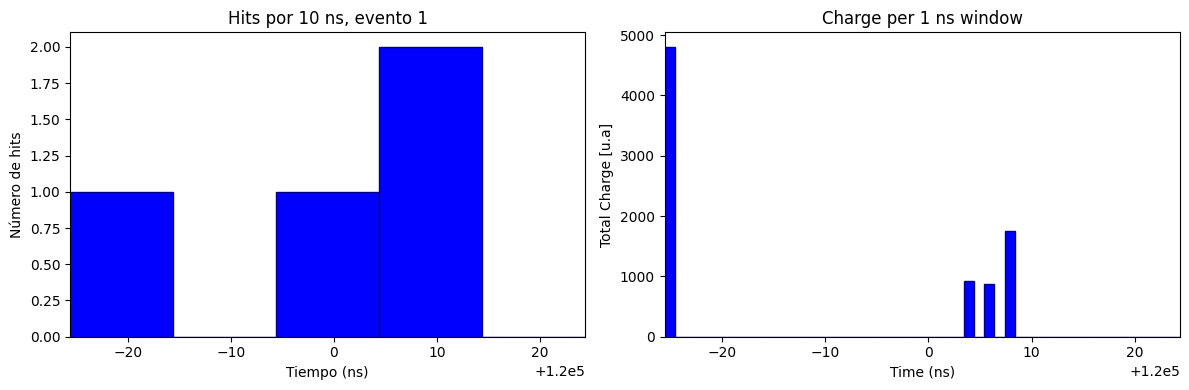

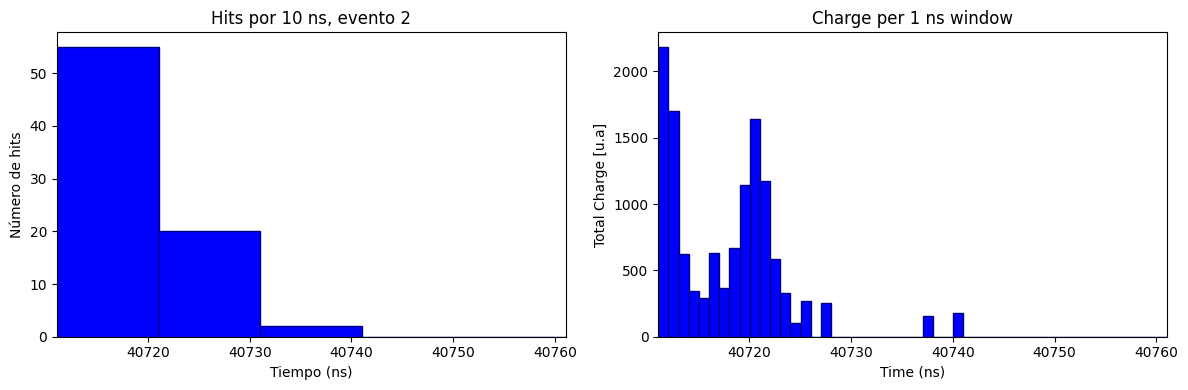

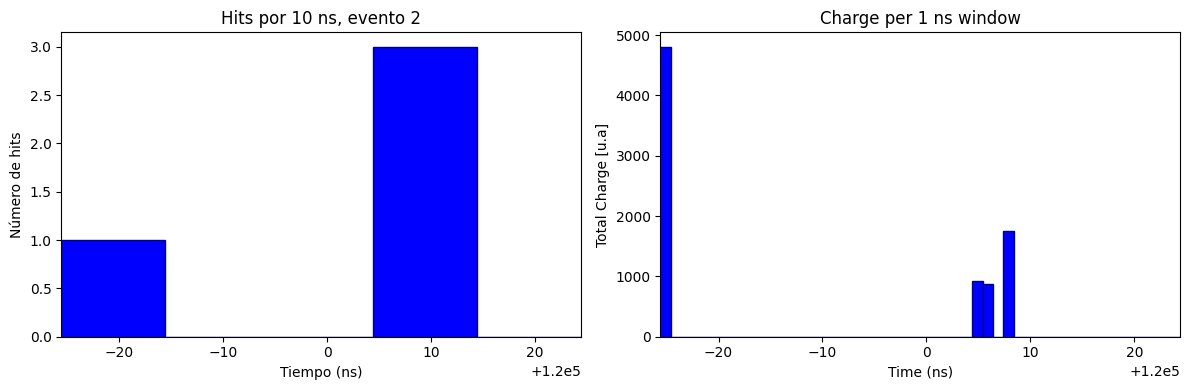

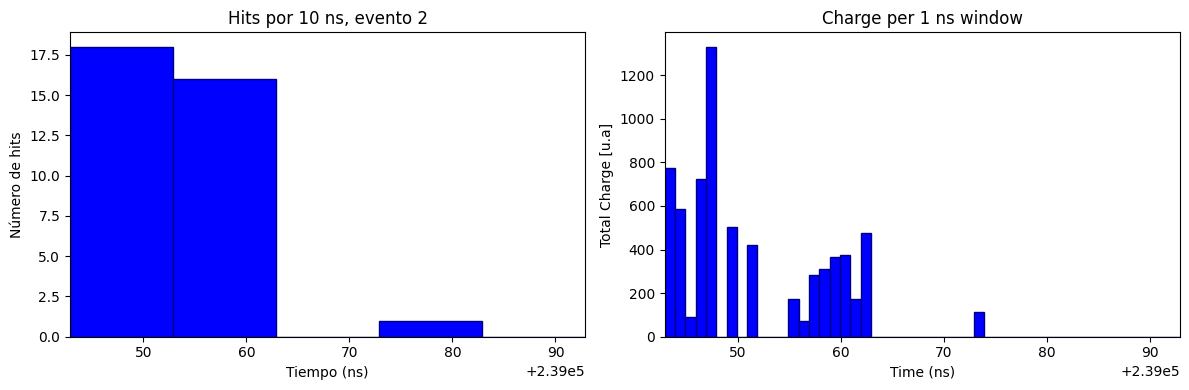

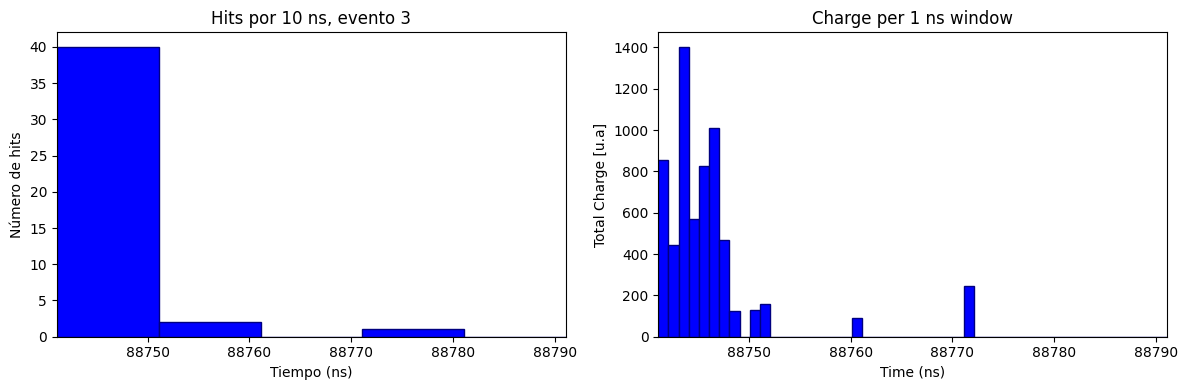

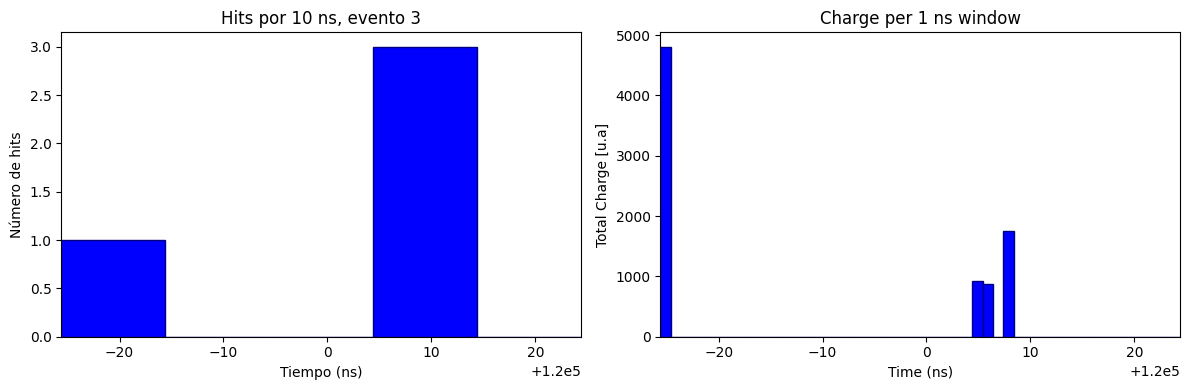

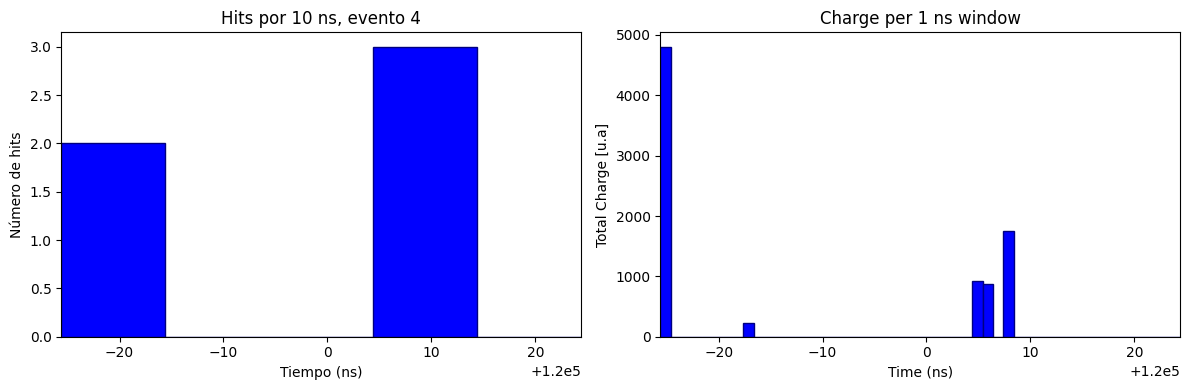

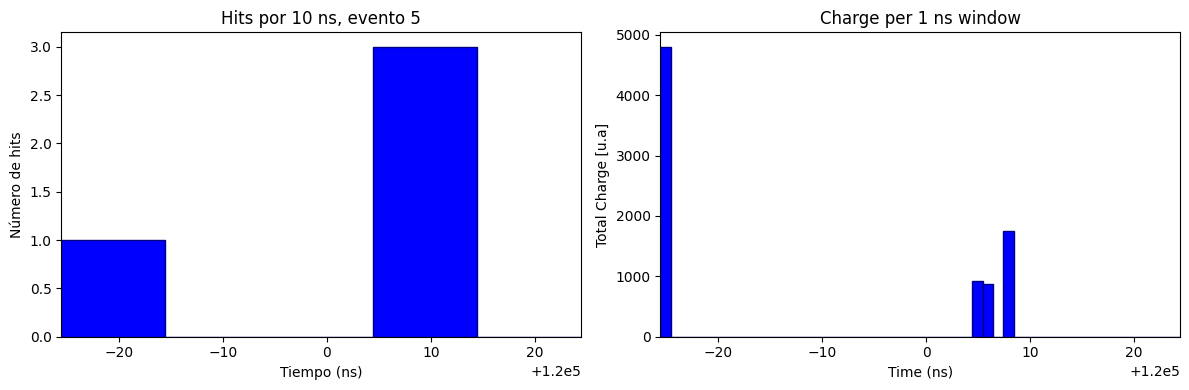

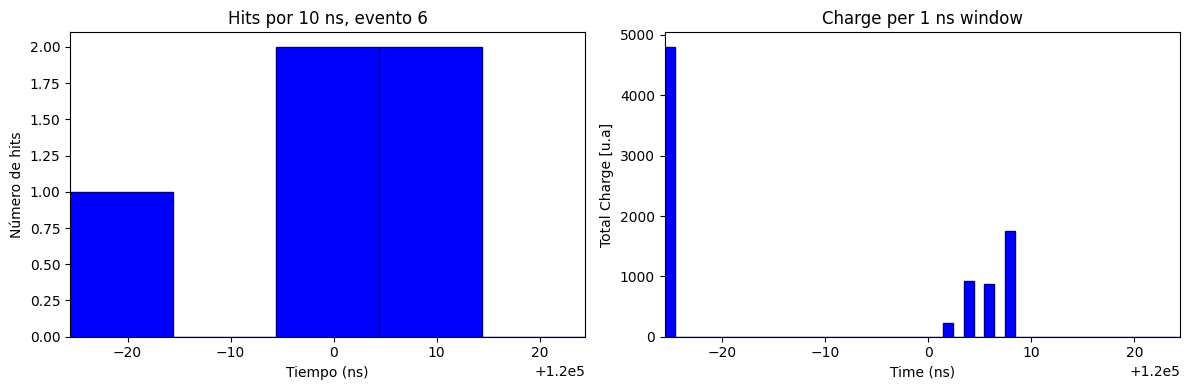

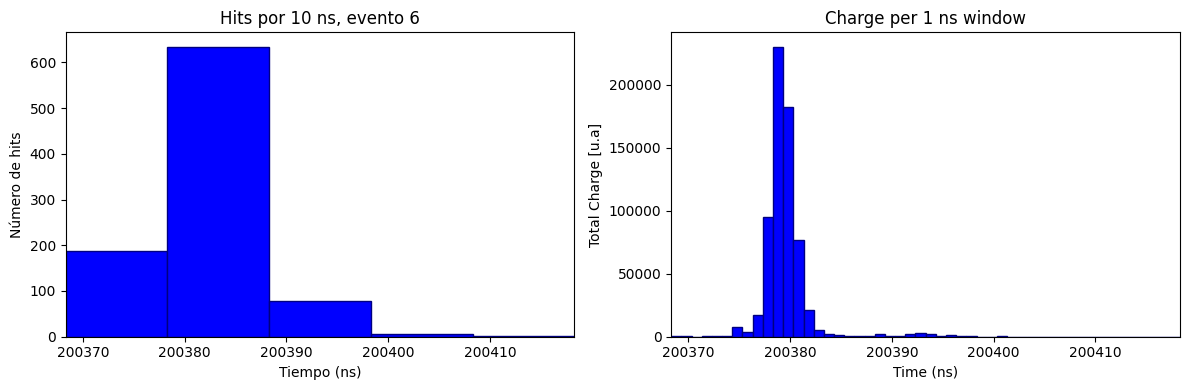

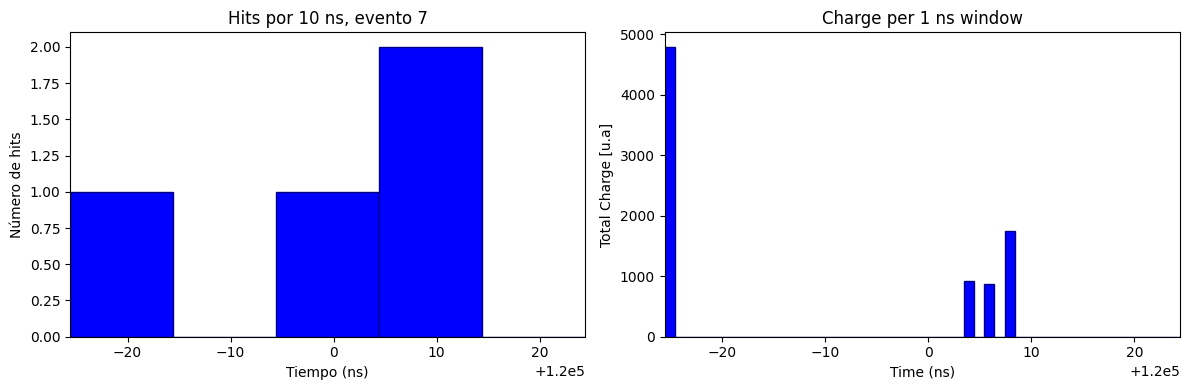

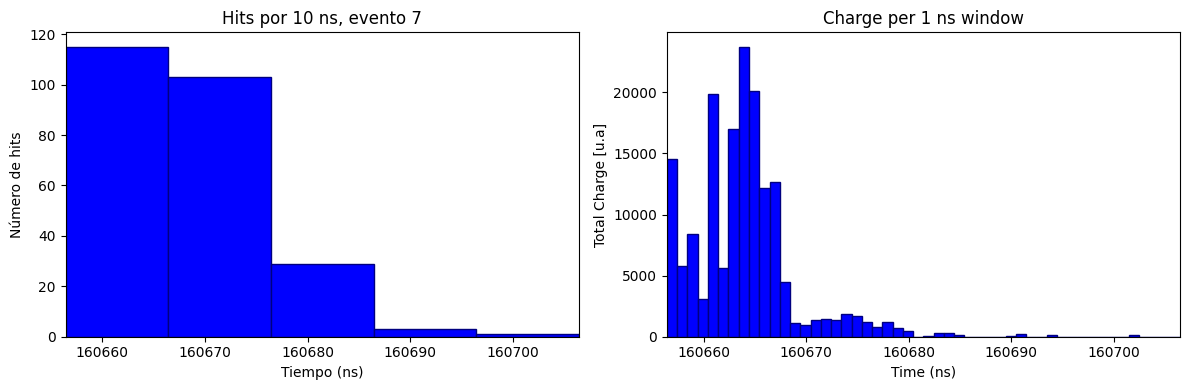

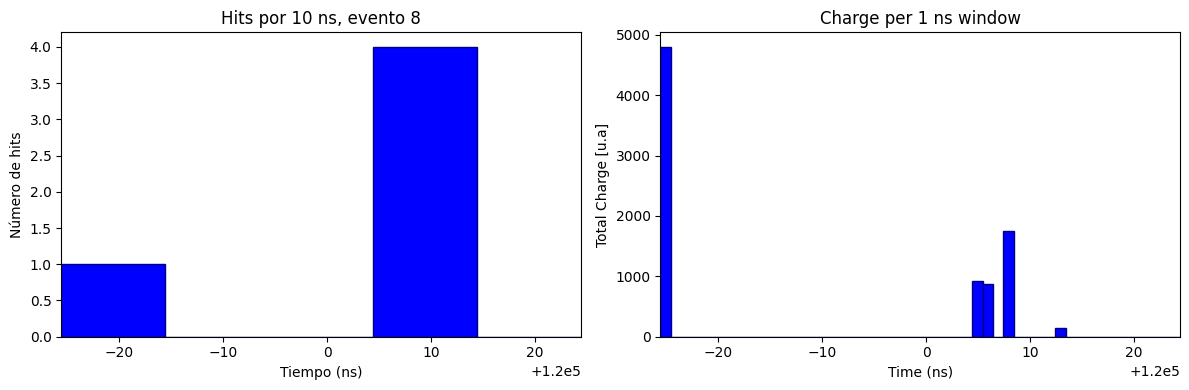

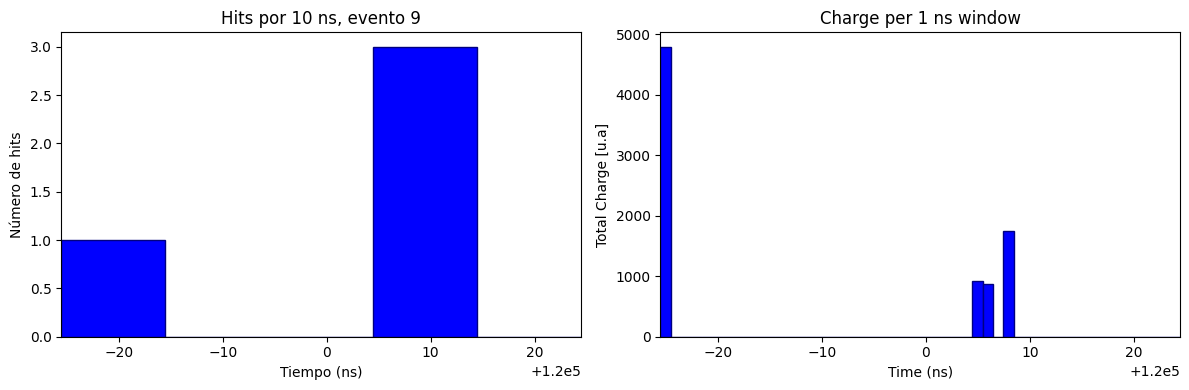

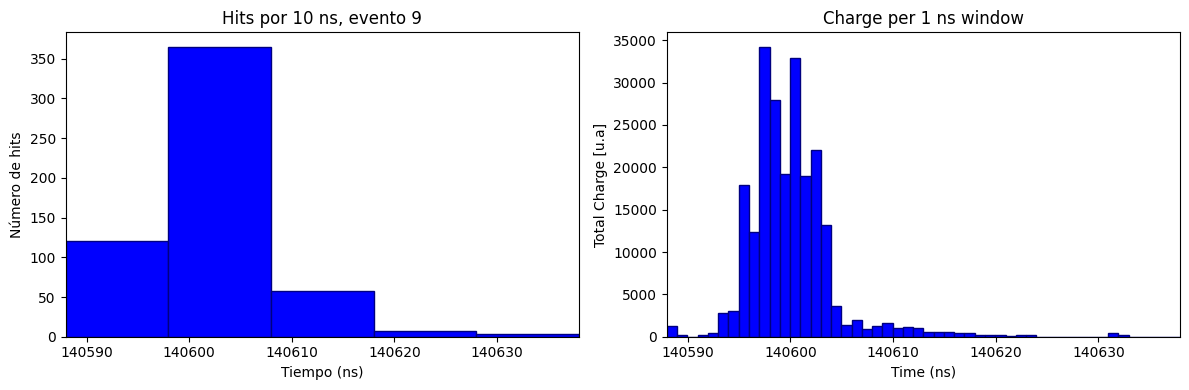

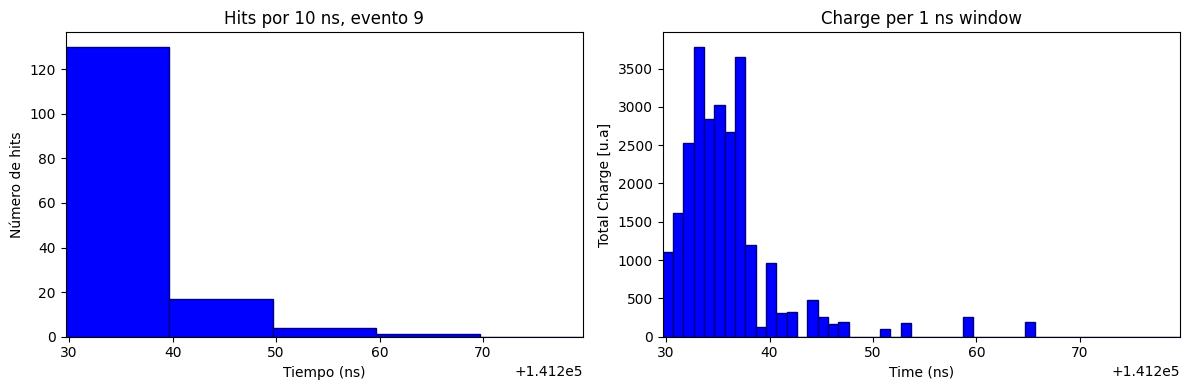

In [69]:
trigger_times_half = dict(list(threshold_charges.items())[0:10])
bin_time = 1

for event_number in trigger_times_half:
    for start_time in trigger_times_half[event_number]:
        times_branch_event = times_branch[event_number]
        charges_branch_event = charge_branch[event_number]

        mask = (times_branch_event >= start_time) & (times_branch_event < start_time + 50)

        time = times_branch_event[mask]
        charge = charges_branch_event[mask]

        plt.style.use('default')
        fig, axs = plt.subplots(1, 2, figsize=(12, 4))

        # --- Subplot 2: Histograma de número de hits en ventanas de 10 ns ---
        axs[0].hist(time, range=(start_time, start_time + 50), bins=5, color='blue', edgecolor='navy')
        axs[0].set_xlabel('Tiempo (ns)')
        axs[0].set_ylabel('Número de hits')
        axs[0].set_title(f"Hits por 10 ns, evento {event_number}")
        axs[0].set_xlim(start_time, start_time+50)

        sum_charges = functions_spills.plot_TotalCharge_Time(time, charge, bin_time)

        axs[1].bar(np.arange(start_time, start_time+50, bin_time), sum_charges, width = bin_time, color='blue',  align='edge', edgecolor='navy')
        axs[1].set_xlabel("Time (ns)")
        axs[1].set_ylabel("Total Charge [u.a]")
        axs[1].set_title(f"Charge per {bin_time} ns window")
        axs[1].set_xlim(start_time, start_time+50)
        plt.tight_layout()
        plt.show()